## Análise inicial

In [602]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [603]:
df = pd.read_csv("desafio_indicium_imdb.csv")
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


É possível observar que existem algumas colunas que poderiam ser valores numéricos, mas que estão como strings no dataset, como a coluna `Runtime` que poderia ter apenas o valor de tempo.

In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Pode-se confirmar com o `df.info()` que as colunas `Released_Year`, `Runtime`, e `Gross` estão como object, mas se encaixariam melhor se fossem variáveis numéricas. Também é possível visualizar que o dataset possui 999 linhas e 16 colunas, mas que algumas colunas existem valores faltando.

In [605]:
df.isnull().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


Aqui se confirma o que foi dito sobre os valores que estão faltando ou são nulos.

In [606]:
df.drop_duplicates(inplace=True)

Removendo também possíveis linhas duplicadas do dataset

## Pré-processamento dos dados

Essa etapa será para corrigir os pontos encontrados acima.

Primeiramente tentar converter os valores de object para numeric.

In [607]:
df['Runtime'] = df['Runtime'].str.replace('min', '') # Nessa coluna foi necessário tirar o texto 'min' que acompanha o valor de tempo
df['Runtime'] = pd.to_numeric(df['Runtime'])

In [608]:
try:
  df['Released_Year'] = pd.to_numeric(df['Released_Year'])
except ValueError as vError:
  print(vError)

Unable to parse string "PG" at position 965


Foi acusado um error de que existia uma célula na posição 965 que estava com um valor 'PG' ao invés de um número e por isso não foi possível converter a coluna toda para numérico.

In [609]:
df[df['Released_Year'] == 'PG']

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,966,Apollo 13,PG,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


Analisando a condição, é possível ver que só tem uma única linha que possui o valor 'PG' na coluna de `Released_Year`, isso sugere que pode ter sido ocasionado por algum erro na coleta dos dados ou algo do tipo.

Fazendo uma busca rápida sobre o título do filme (pelo site: https://www.imdb.com/title/tt0112384/) é possível ver que o valor pertence à coluna `Certificate` que se refere à classificação indicativa do filme, e que a data de lançamento foi em 1995.

In [610]:
df.loc[df['Series_Title'] == 'Apollo 13', 'Released_Year'] = 1995
df.loc[df['Series_Title'] == 'Apollo 13', 'Certificate'] = 'PG'

In [611]:
df[df['Series_Title'] == 'Apollo 13']

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,966,Apollo 13,1995,PG,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [612]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'])

Após as mudanças, foi possível converter a coluna para valores numéricos.

In [613]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'])

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    int64  
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.0+ KB


Todas as colunas foram convertidas de acordo com a análise (object para numeric).

Antes de tratar os dados nulos, é possível tirar algumas informações com o `df.describe()`.

In [615]:
df.describe()

,Unnamed: 0,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,500.000000,1991.218218,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,288.530761,23.297166,28.101227,0.272290,12.383257,3.209126e+05,1.098076e+08
min,1.000000,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,250.500000,1976.000000,103.000000,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,500.000000,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,749.500000,2009.000000,137.000000,8.100000,87.000000,3.731675e+05,8.087634e+07
max,999.000000,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


A nota média do IMDB é aproximadamente 7.9, o que é uma nota muito boa considerando que a escala vai de 1 a 10. E a média da coluna Gross, que seria a bilheteria, está bem alta também, entretanto, vendo a mediana (50%), é possível ver que é muito mais baixa, isso implica que existem valores muito altos de Gross que estão puxando a média para cima.

Além disso, existem valores nulos na coluna `Gross`, que podem ser substituídos pela mediana dos valores. Entretanto existem aproximadamente 17% dos valores nulos em toda a coluna, e preencher só com a mediana geral, ficaria meio distorcido, então outra abordagem pode ser relacionar uma outra coluna para agrupar a mediana de acordo com essa outra coluna.

Pode-se relacionar a coluna de `Released_Year` com a `Gross`, já que, contando com a inflação, o mesmo valor de décadas atrás não vale o mesmo do que nos dias de hoje. Então podemos criar por exemplo uma coluna que tem a mediana de bilheteria a cada década do ano mais antigo, para o mais atual.

In [616]:
# Da pra fazer isso pegando a parte inteira do ano, e daí multiplicando por 10

# Ex: 1947, ficaria 194 e multiplicando por 10 = 1940, quer seria década de 1940

df['Decade'] = (df['Released_Year'] // 10) * 10

In [617]:
df['Decade'].value_counts()

,count
Decade,
2010,242
2000,237
1990,150
1980,89
1970,76
1960,73
1950,56
1940,35
1930,24


É possível observar que deu certo, e também notar que a maioria dos filmes desse dataset pertencem às décadas de 2010 e 2000.

Agora podemos agrupar e fazer a mediana para cada década com o uso do groupby

In [618]:
median_for_decade = df.groupby('Decade')['Gross'].transform('median')

In [619]:
median_for_decade

,Gross
0,31800000.0
1,23637265.0
2,31800000.0
3,8000000.0
4,23637265.0
...,...
994,16217773.0
995,8000000.0
996,8000000.0
997,3505000.0


Nota-se que o ano de 2020 foi o único que teve valores `NaN`, e isso faz muito sentido porque foi o ano em que ocorreu a pandemia do Corona Vírus e ninguém podia sair de casa.

Também é possível observar saltos de faturamento entre as décadas, que podem significar marcos na história cinematográfica.

In [620]:
df['Gross'] = df['Gross'].fillna(median_for_decade)

Assim, a coluna Gross que tinham dados faltantes foi preenchida com a mediana por década.

# Análise de características e primeiras hipóteses

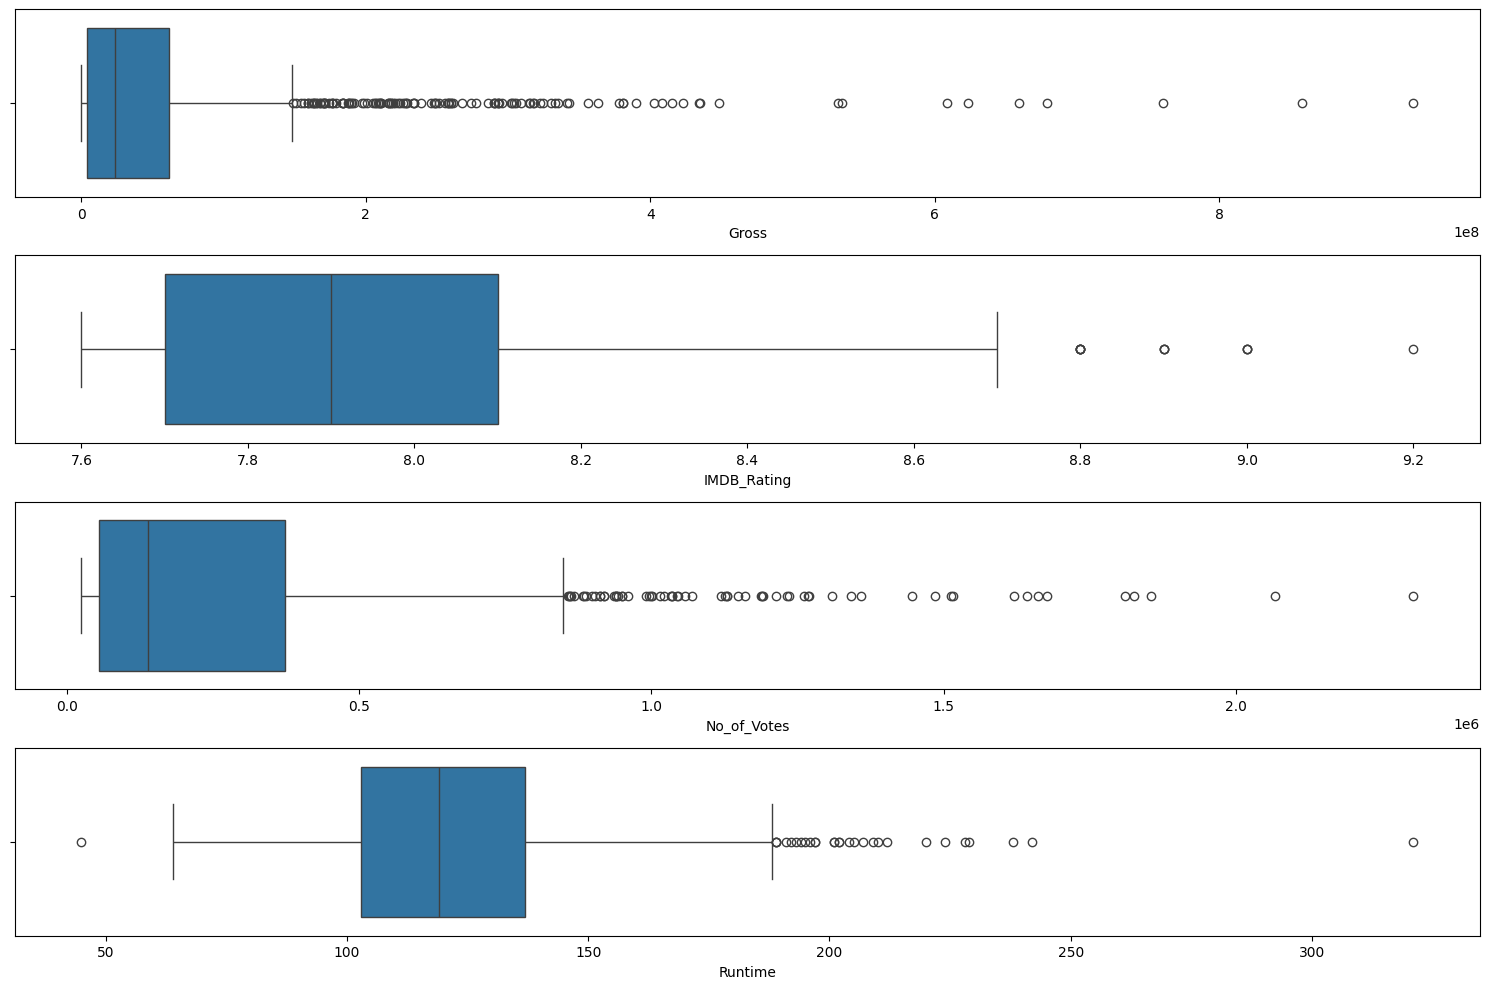

In [621]:
fig, axes = plt.subplots(4, 1, figsize=(15, 10))

sns.boxplot(ax = axes[0], data = df, x = 'Gross')

sns.boxplot(ax = axes[1], data = df, x = 'IMDB_Rating')

sns.boxplot(ax = axes[2], data = df, x = 'No_of_Votes')

sns.boxplot(ax = axes[3], data = df, x = 'Runtime')

plt.tight_layout()
plt.show()

Já de início é possível observar que existem muitos outliers acima do limite superior tanto em `Gross` quanto em `No_of_Votes`, e a parte superior alongada também indica que os dados possuem uma assimetria positiva. Enquanto que no boxplot de `Runtime`, parece bem simétrico, o que sugere uma distribuição normal dos dados em torno da média.

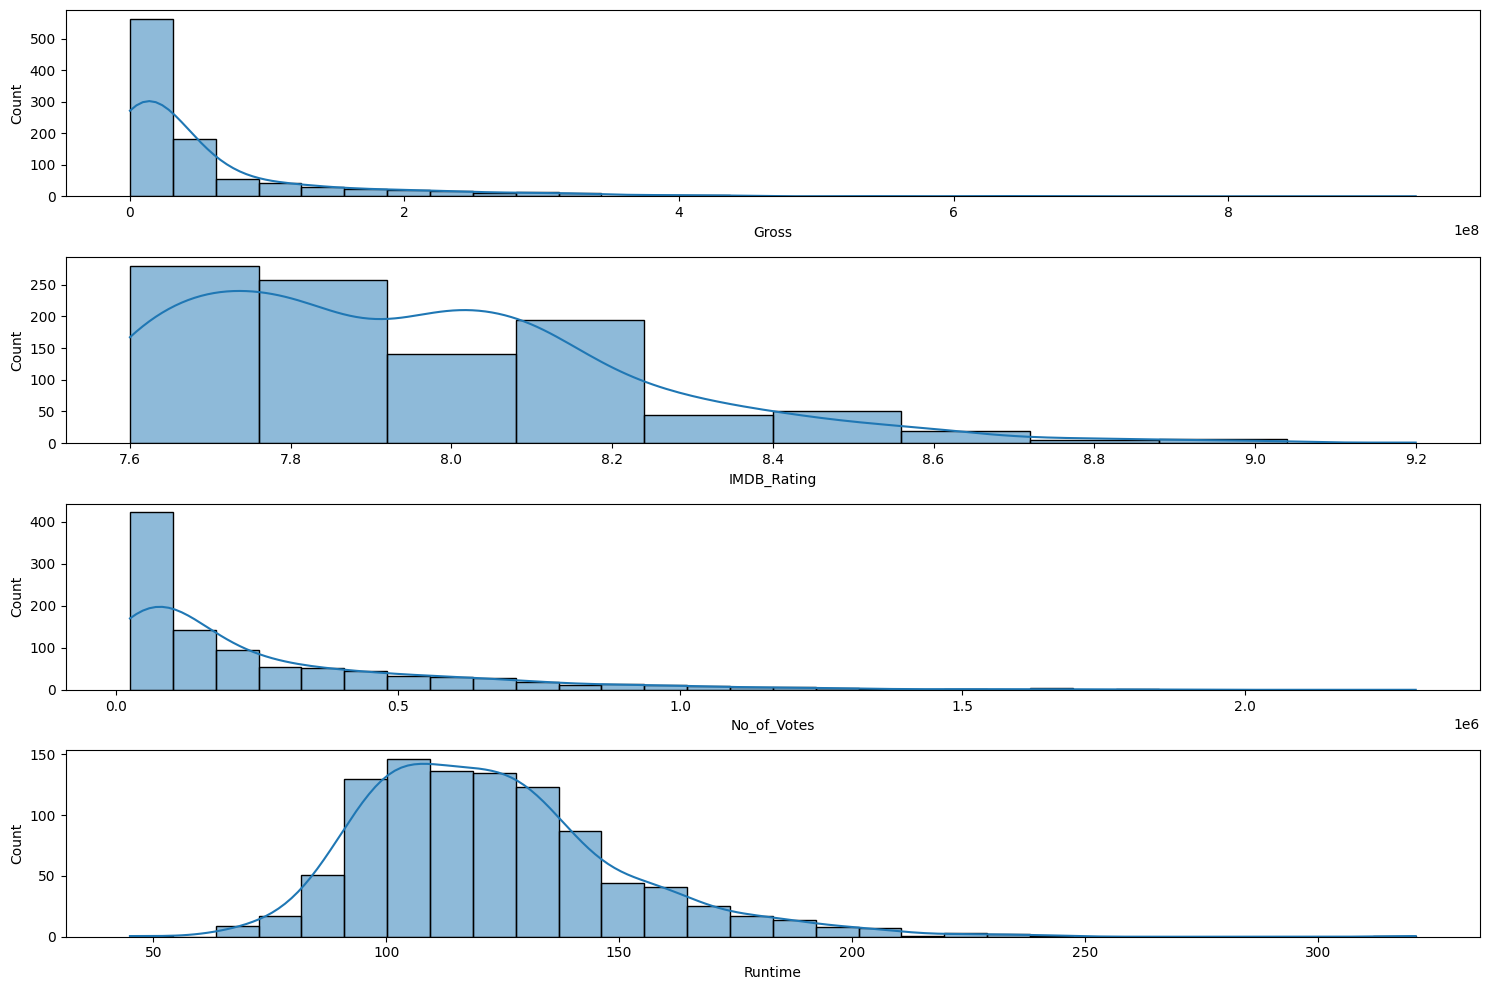

In [622]:
fig, axes = plt.subplots(4, 1, figsize=(15, 10))

sns.histplot(ax = axes[0], data = df, x = 'Gross', kde = True, bins = 30)

sns.histplot(ax = axes[1], data = df, x = 'IMDB_Rating', kde = True, bins = 10)

sns.histplot(ax = axes[2], data = df, x = 'No_of_Votes', kde = True, bins = 30)

sns.histplot(ax = axes[3], data = df, x = 'Runtime', kde = True, bins = 30)

plt.tight_layout()
plt.show()

É possível observar no gráfico que a coluna `Gross` e `No_of_Votes` tem um comportamento bem semelhante. E ambos possuem uma assimetria ou Skewness positiva como foi previsto analisando pelo boxplot, isso significa que para a coluna `Gross`, o faturamento da maioria dos filmes são relativamente baixos, em comparação com a cauda, que são valores muito mais altos.

O mesmo acontece com a coluna `No_of_Votes`, onde a maioria dos votos são relativamente baixos em comparação com os demais, isso porque são poucos os filmes que viralizam, e consequentemente recebem uma quantidade maior de votos.

Pode-se dizer que a coluna do `IMDB_rating` também segue a mesma lógica, já que também são poucos os filmes com notas muito altas.

A coluna `Runtime` possui um comportamento semelhante à uma curva normal, com uma média próxima de 120 minutos de duração.

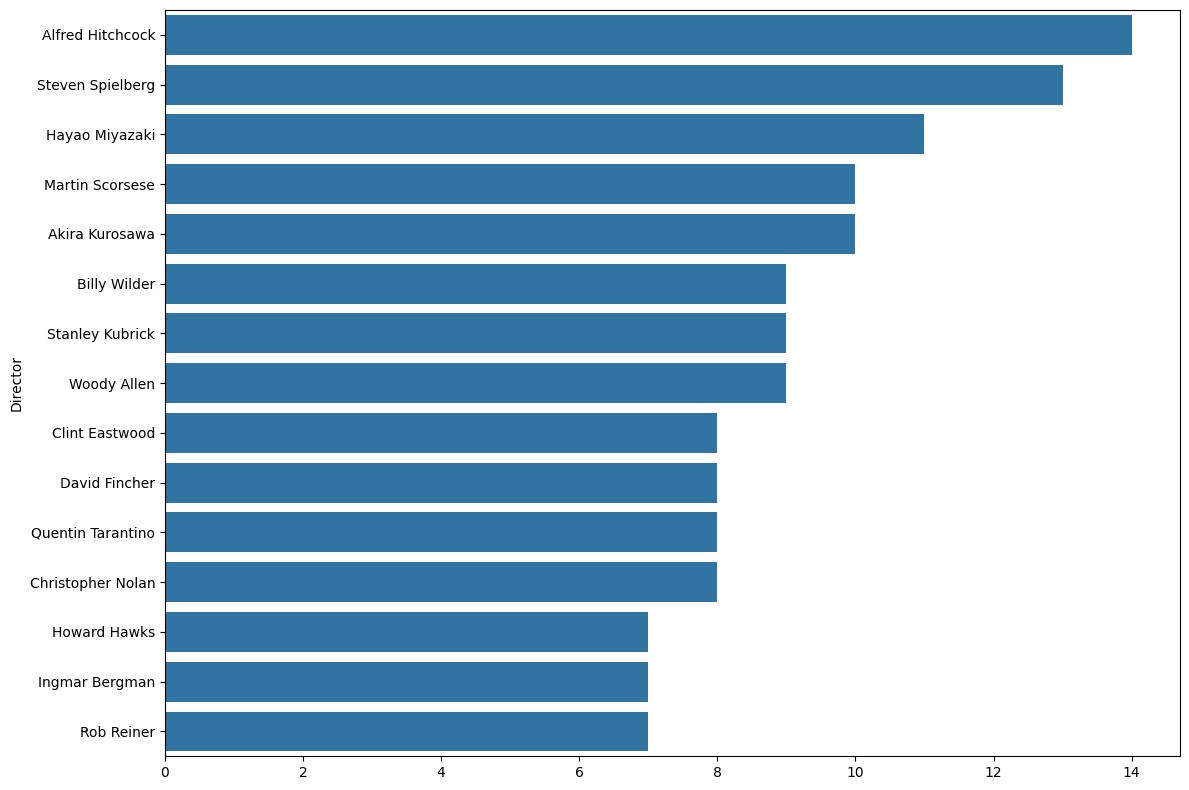

In [623]:
plt.figure(figsize=(12, 8))

top_15_directors = df['Director'].value_counts().nlargest(15)

sns.barplot(x=top_15_directors.values, y=top_15_directors.index)

plt.tight_layout()
plt.show()

Aqui foi feita uma comparação entre os 15 diretores que mais aparecem no dataset.

**Será que um diretor produzir muitos filmes tem alguma relação com o sucesso de bilheteria?**

In [624]:
df_top_15_directors = df[df['Director'].isin(top_15_directors.index)]
df_without_top15 = df[~(df['Director'].isin(top_15_directors.index))]

df_top_15_directors.describe()

,Unnamed: 0,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Decade
count,138.000000,138.000000,138.000000,138.000000,121.000000,1.380000e+02,1.380000e+02,138.000000
mean,397.710145,1980.739130,124.601449,8.069565,82.157025,4.196259e+05,6.156679e+07,1976.231884
std,301.490294,23.412924,29.053321,0.317060,10.830519,4.762017e+05,9.220002e+07,23.466171
min,2.000000,1932.000000,79.000000,7.600000,45.000000,2.531200e+04,1.256200e+04,1930.000000
25%,119.500000,1959.000000,101.000000,7.800000,75.000000,7.792875e+04,7.157500e+06,1950.000000
50%,302.000000,1984.500000,120.500000,8.100000,83.000000,1.986475e+05,2.698405e+07,1980.000000
75%,679.500000,2002.000000,141.000000,8.300000,90.000000,6.040375e+05,8.567983e+07,2000.000000
max,999.000000,2019.000000,209.000000,9.000000,100.000000,2.303232e+06,5.348584e+08,2010.000000


In [625]:
df_without_top15.describe()

,Unnamed: 0,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Decade
count,861.00000,861.000000,861.000000,861.000000,721.000000,8.610000e+02,8.550000e+02,861.000000
mean,516.39489,1992.897793,122.594657,7.928455,77.266297,2.478994e+05,6.001243e+07,1988.246225
std,283.16184,22.849126,27.953024,0.259366,12.494936,2.816155e+05,1.036086e+08,22.723101
min,1.00000,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03,1920.000000
25%,279.00000,1979.000000,103.000000,7.700000,70.000000,5.289700e+04,3.505000e+06,1970.000000
50%,516.00000,2000.000000,119.000000,7.900000,78.000000,1.259930e+05,2.353089e+07,2000.000000
75%,764.00000,2010.000000,135.000000,8.100000,86.000000,3.554130e+05,5.981332e+07,2010.000000
max,997.00000,2020.000000,321.000000,9.200000,100.000000,1.809221e+06,9.366622e+08,2020.000000


Pode-se perceber que a média das colunas `IMDB_Rating`, `Meta_score` e `Gross` são todos maiores no dataset em que estão apenas os top 15 diretores que mais aparecem no dataset, em comparação com o restante do dataset original, isso mostra que sim, os diretores que produzem muitos filmes estão associados com o desempenho da bilheteria e avaliações maiores.

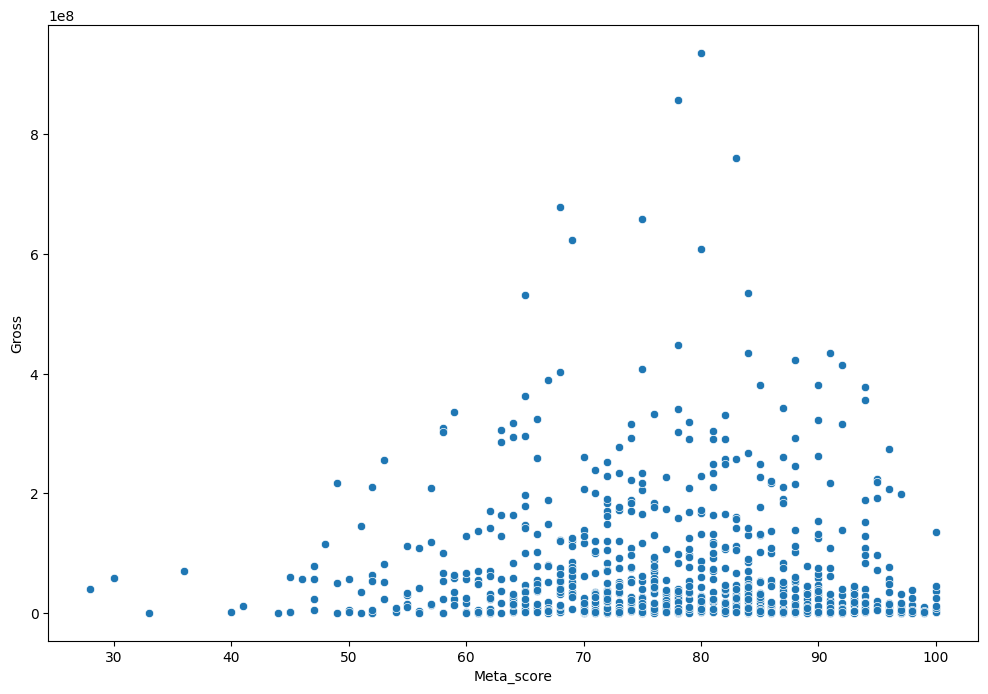

In [626]:
plt.figure(figsize=(12,8))
sns.scatterplot(df, x='Meta_score', y='Gross')

plt.show()

Nesse gráfico é possível perceber que os dados estão mais inclinados para a direita e para cima, mas ainda assim, não se pode dizer que ter nota alta é sinônimo de sucesso de bilheteria. Existem filmes com nota menor que 70 que renderam muito mais do que filmes com nota 80 para cima.

In [627]:
correlation_meta_gross = df['Meta_score'].corr(df['Gross'])

print(f"O coeficiente de correlação entre Meta score e Gross é: {correlation_meta_gross:.4f}")

O coeficiente de correlação entre Meta score e Gross é: -0.0509


O coeficiente mostra que não existe correlação ou é muito baixa.

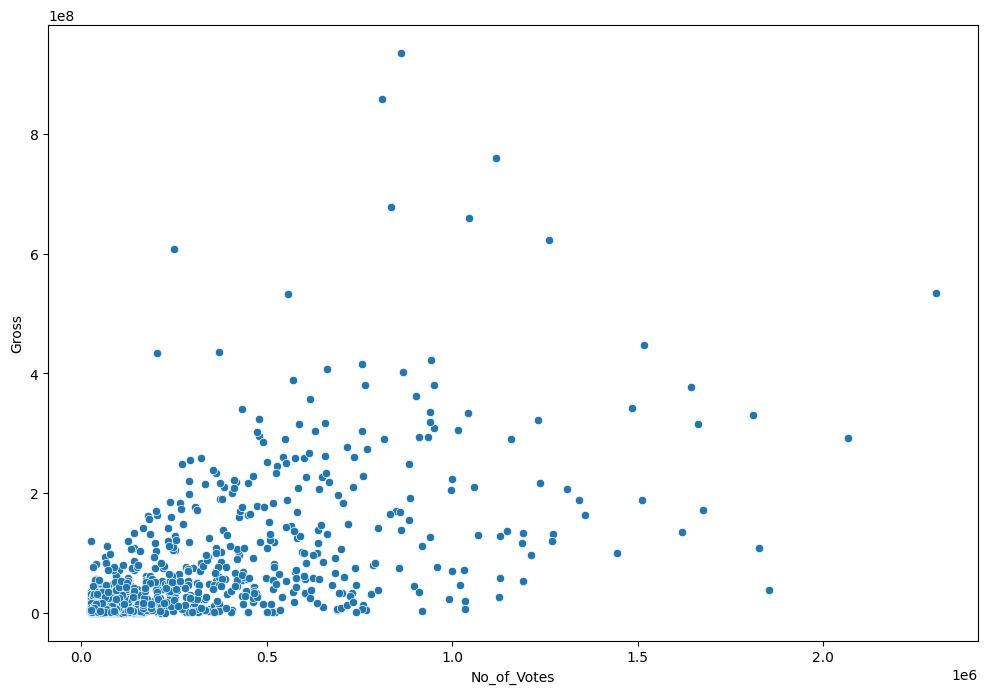

In [628]:
plt.figure(figsize=(12,8))
sns.scatterplot(df, x='No_of_Votes', y='Gross')

plt.show()

Aqui existe uma correlação, onde conforme o numero de votos aumenta, a receita também aumenta, entretanto, um número grande de votos não significa que o filme será lucrativo, pois existem filmes com poucos votos relativos, que lucraram muito mais do que com muitos votos. Mas um número grande de votos influencia muito no sucesso de um filme, pois exige um certo engajamento das pessoas pra que isso aconteça.



In [629]:
correlation_votes_gross = df['No_of_Votes'].corr(df['Gross'])

print(f"O coeficiente de correlação entre No Votes e Gross é: {correlation_votes_gross:.4f}")

O coeficiente de correlação entre No Votes e Gross é: 0.6038


É uma correlação perto de +1, isso significa que é uma correlação positiva, indicando que existe uma tendência entre essas duas colunas.

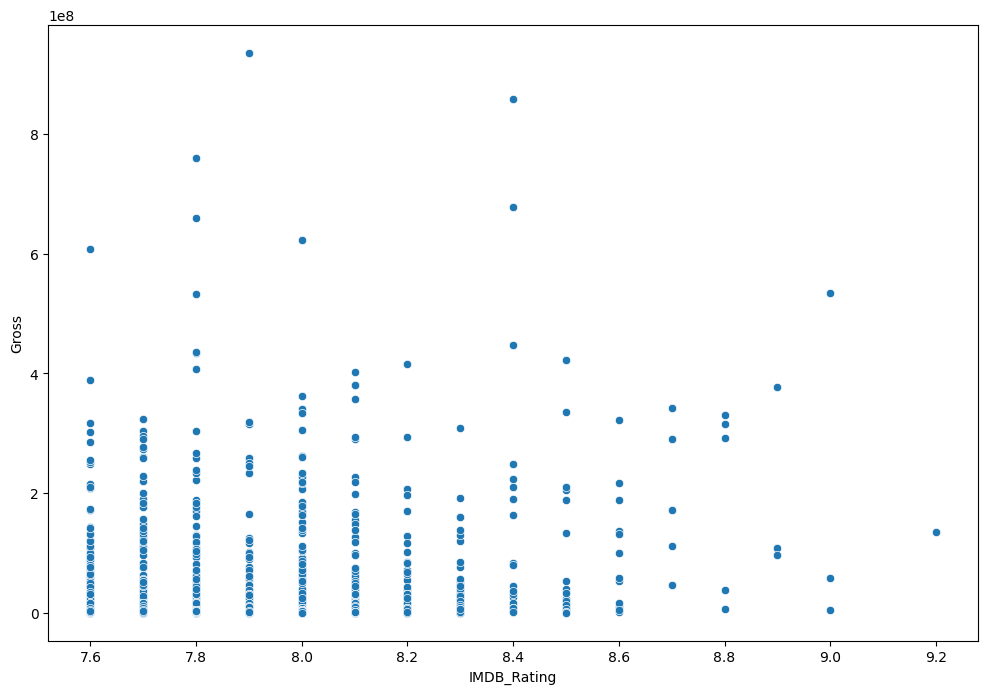

In [630]:
plt.figure(figsize=(12,8))
sns.scatterplot(df, x='IMDB_Rating', y='Gross')

plt.show()

Esse gráfico mostra que uma nota maior no IMDB de um filme não significa que ele será lucrativo, visto que os pontos estão espalhados de forma que, um filme com nota 7,9 arrecadou mais do que um com 9,2. Claro que também existe influencia da inflação, já que um valor bruto menor antigamente poderia valer mais ou equivalente do que um valor bruto nos dias de hoje, conforme foi dito anteriormente.

In [631]:
correlation_imdb_gross = df['IMDB_Rating'].corr(df['Gross'])

print(f"O coeficiente de correlação entre IMDB e Gross é: {correlation_imdb_gross:.4f}")

O coeficiente de correlação entre IMDB e Gross é: 0.0907


Esse coeficiente mostra que a correlação entre essas 2 colunas é muito baixa ou quase inexistente.

**Será que a bilheteria média quanto o tempo de duração aumentaram ao longo das décadas?**

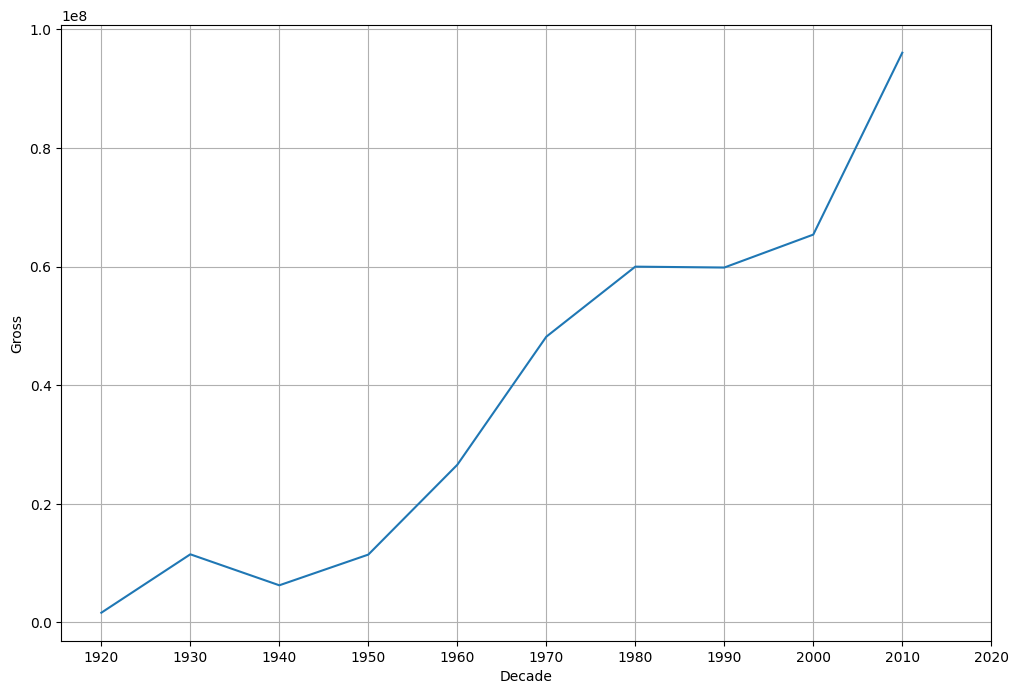

In [632]:
gross_per_decade = df.groupby('Decade')['Gross'].mean()
runtime_per_decade = df.groupby('Decade')['Runtime'].mean()

plt.figure(figsize=(12,8))
sns.lineplot(gross_per_decade)
plt.xticks(gross_per_decade.index)
plt.grid()
plt.show()

É possível ver pelo gráfico que sim, desde 1920 até 2010 a bilheteria média aumentou consideravelmente, chegando a quase 1 bilhão em 9 décadas de acordo com os dados do dataset.

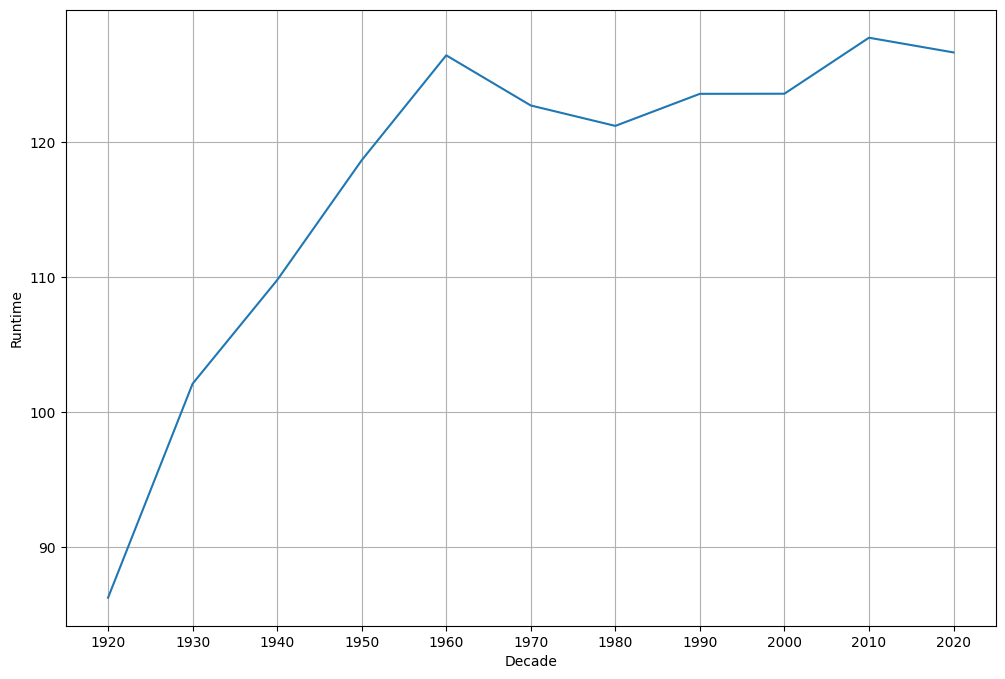

In [633]:
plt.figure(figsize=(12,8))
sns.lineplot(runtime_per_decade)
plt.xticks(runtime_per_decade.index)
plt.grid()
plt.show()

Também é possível observar que a duração aumentou até a década de 1960, e depois disso se manteve mais ou menos no mesmo patamar, entre 120 e 130 minutos, o equivalente a 2h de filme.

Mas será que filmes com duração maior tendem a ser mais bem avaliados?

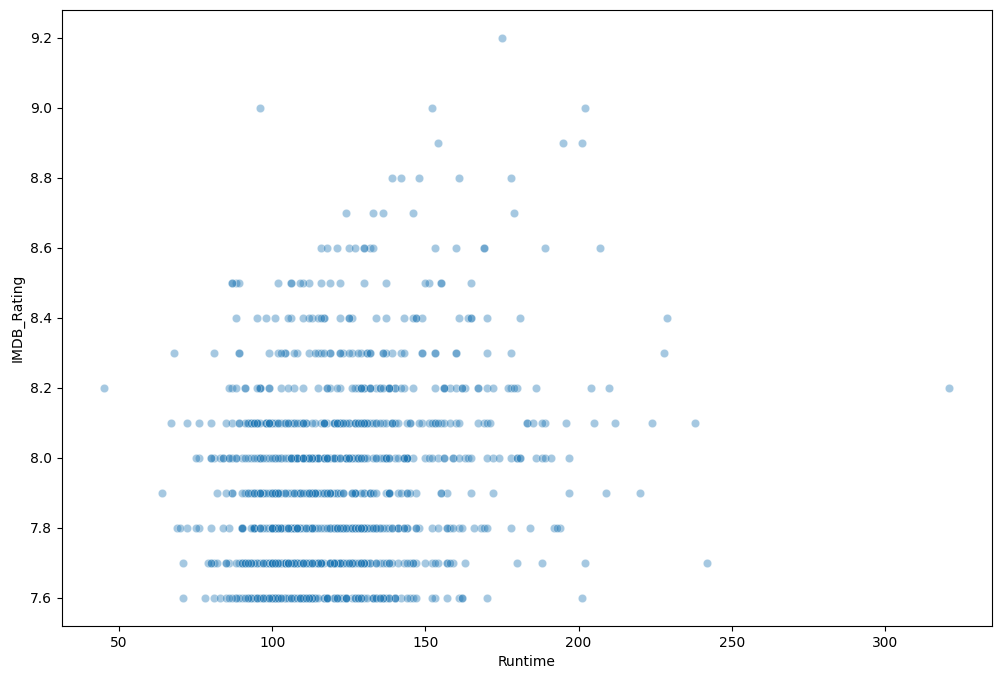

In [634]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Runtime', y='IMDB_Rating', alpha=0.4)
plt.show()

Pelo gráfico, a maioria dos filmes está entre 100 e 150 minutos de duração, com notas entre 8.0 e 8.8, entretanto não se pode afirmar que tem alguma correlação.

In [635]:
correlation = df['Runtime'].corr(df['IMDB_Rating'])

print(f"O coeficiente de correlação entre Duração e Nota no IMDb é: {correlation:.4f}")

O coeficiente de correlação entre Duração e Nota no IMDb é: 0.2428


Pelo coeficiente, a correlação é fraca, existe uma tendência mas é muito fraca, sendo assim, a duração do filme não é muito forte pra tentar prever a nota dele.

# Respostas às perguntas do desafio

## Qual filme você recomendaria para uma pessoa que você não conhece?

Para recomendar um filme para alguém que não conheço, utilizaria as colunas de `IMDB_Rating`, `Meta_score` e `No_of_Votes` para fazer um top 5 de melhores avaliados.



Primeiro é necessário preencher os valores faltantes, vou fazer o input da mediana geral da coluna para preencher esses valores.

In [636]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())

In [637]:
imdb_threshold = 8.5
metascore_threshold = 95

filter_df_treshold = df[(df['IMDB_Rating'] > imdb_threshold) &
                        (df['Meta_score'] > metascore_threshold)]


recommendation = filter_df_treshold.sort_values(by='No_of_Votes', ascending=False)
columns = ['Series_Title', 'Genre', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']
recommendation[columns].head(5)

,Series_Title,Genre,IMDB_Rating,Meta_score,No_of_Votes
0,The Godfather,"Crime, Drama",9.2,100.0,1620367
3,12 Angry Men,"Crime, Drama",9.0,96.0,689845
22,Sen to Chihiro no kamikakushi,"Animation, Adventure, Family",8.6,96.0,651376
18,Gisaengchung,"Comedy, Drama, Thriller",8.6,96.0,552778
30,Shichinin no samurai,"Action, Adventure, Drama",8.6,98.0,315744


Utilizando limiares tanto para a nota IMDB quanto para o valor de críticas, foi criado um top 5 de filmes que atendem esses requisitos, e assim podem ser recomendados com tranquilidade para alguém que não conheço, já que são filmes bem aclamados pelo público.

## Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?


- O número de votos é um forte fator que influencia no faturamento, como foi possível observar com o coeficiente de correlação entre a coluna de `No_of_Votes` e `Gross`, isso porque significa que a pessoa assistiu o filme e foi avaliar. Isso mostra tanto o alcance do público quanto a satisfação com o filme.
- A influencia de um diretor famoso ou conhecido também é grande, visto que o dataset com os **top 15 diretores** tiveram um faturamento maior do que o restante, mesmo sendo pouco mais de 13% de todo o dataset.
- A influencia do tempo também ajudou com o crescimento do faturamento ao longo dos anos, isso pode ser pelo fato de **novas tecnologias** sempre melhorando o cinema e entretenimento audiovisual, como também o aumento do preço dos bilhetes acompanhando a **inflação**.

## Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?


Existem palavras-chave que podem ser úteis para fazer uma inferência de gênero, utilizando modelos NLP de classificação para tentar processar essas palavras.

In [638]:
complete_overview = df.loc[0, 'Overview']   # Pegando o overview da primeira linha do dataset
print(complete_overview)

An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.


É possível ver que existem palavras como "organized", "crime", "control", "clandestine", "reluctant" e "son". Com essas palavras dá pra se ter uma ideia de que o filme pode ser de Drama, Crime e talvez alguns elementos de Thriller.

In [639]:
genre_overview = df.loc[0, 'Genre']
print(genre_overview)

Crime, Drama


Como se pode ver, o filme é de Crime e Drama. É possível treinar modelos de classificação para fazer essa mesma inferência, então sim, é possível inferir um gênero de filme com base no Overview dele.

Além disso, também é possível fazer análise de sentimentos e com isso associar à outras colunas pra ver se existe alguma correlação entre o "tom" do resumo com o sucesso do filme, já que o Overview funciona como uma sinopse, que é como se fosse um trailler textual pra quem não sabe nada sobre o filme.

# Previsão do IMDB

De acordo com o [site](https://www.imdb.com/pt/title/tt0111161/) do IMDB, o filme The Shawshank Redemption tem nota 9.3/10, e é o filme com maior nota nessa plataforma. O objetivo é prever a nota utilizando os dados do dataset e ver se a previsão se aproxima dessa nota. E como vamos prever um valor contínuo, isso se torna um problema de **Regressão**.

In [640]:
# Dados do Shawshank Redemption
shawshank_data = {
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Primary_Genre': 'Drama'
}

Esses são os dados que considerei relevantes para treinar o modelo, já que se pode associá-los levando em conta toda a análise que foi feita anteriormente, os dados foram tirados do documento [docs](https://docs.google.com/document/d/1uqSPghyJWCA52ryilZrF63Ep5OzB1Yl2pBnUyaFHpS8/edit?tab=t.0) que foi enviado por e-mail. Mas basicamente:

- Meta_score: Tem uma grande influência no treinamento do modelo, já que essa coluna representa a opinião dos críticos, pois é a média ponderada de todas as críticas.
- No_of_Votes: Essa medida mostra o alcance e popularidade, já que é a quantidade de votos para uma determinada nota (uma nota 9.5 com 10 votos tem menos peso do que uma nota 8.3 com 50.000 votos).
- Genre: Um filme pode ter uma nota diferente no IMDB simplesmente por pertencer à um gênero, já que pode agregar um público maior do que outros gêneros, e consequentemente ser propenso a ter mais críticas, sejam elas positivas ou negativas, aumentando ou diminuindo a nota.

In [641]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [642]:
# criando um novo dataframe com as colunas relevantes para treinar o modelo
df_model = df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Genre']].copy()

# aqui, como a coluna de genero possui mais de 1 gênero por linha geralmente, eu estou pegando
# apenas o primeiro, e considerando ele como o mais relevante
df_model['Primary_Genre'] = df_model['Genre'].str.split(',').str[0].str.strip()

# separando, a variavel dependente que é o y (o que queremos prever)
# e as variaveis independentes, que são os X (que são usadas para prever)
X = df_model[['Meta_score', 'No_of_Votes', 'Primary_Genre']]
y = df_model['IMDB_Rating']

# aqui se faz o train test split, que é separar o dataset em um conjunto de treino
# e conjunto de teste (basicamente ele aprende e vê se as respostas estão certas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['Meta_score', 'No_of_Votes']
categorical_features = ['Primary_Genre']

# usando o Column Transformer pra etapa de pre processamento antes do treino
preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_features), # se for coluna numérica, fica do mesmo jeito
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # se for categória, aplica OneHotEncoder
        ])

# usando o Pipeline pra fazer uma sequencia de passos
model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(random_state=42))
    ])

# treinando o modelo
model_pipeline.fit(X_train, y_train)

test_movie_df = pd.DataFrame([shawshank_data])

# fazendo a inferencia pelos dados do filme que queremos saber a nota
predicted_rating = model_pipeline.predict(test_movie_df)

print(f"A nota real do filme Shawshank pelo IMDB é: 9.3")
print(f"A nota prevista pelo modelo foi: {predicted_rating[0]:.2f}")

A nota real do filme Shawshank pelo IMDB é: 9.3
A nota prevista pelo modelo foi: 8.69


Agora, após a previsão da nota é necessário calcular as métricas de desempenho para verificar se o modelo foi bem estruturado.

In [643]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# previsões no conjunto de teste
y_pred = model_pipeline.predict(X_test)

# métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Absolute Error (MAE): 0.191
Root Mean Squared Error (RMSE): 0.250
R-squared (R²): 0.049


Aqui foram utilizadas 3 métricas, o MAE, RMSE e R²:

- MAE (Erro médio absoluto): Isso significa que em média, o modelo erra apenas 0.191 na nota, entre 1 a 10 do IMDB. E 0.191 é um valor relativamente baixo nessa escala, então é um resultado muito bom.

- RMSE (Raiz do erro médio quadrático): Aqui o valor de 0.25 também é bem baixo, já que essa métrica serve para dar mais peso aos erros maiores, significa que não ocorreram muitos erros grandes.

- R² (R-quadrado): O valor de 0.049 significa que ele só explica aproximadamente 5% das notas reais, quanto mais próximo de 1, melhor seria o valor dessa métrica. Isso pode ser explicado pelo fato que existe uma maior concentração de notas entre 7.6 a 8.3 aproximadamente, ou seja, as notas da coluna `IMDB_rating` não estão muito bem distribuídas, o que acaba afetando no cálculo dessa métrica.

In [644]:
# salvando o modelo para .pkl
import joblib

joblib.dump(model_pipeline, "modelo_imdb.pkl")

['modelo_imdb.pkl']

## Conclusão

No geral, o modelo foi bom em prever a nota com um erro médio bem pequeno, entretanto, considerando apenas as colunas utilizadas para o treinamento, assim como a amostra não ter tanta variabilidade nas notas, não foi possível obter uma melhor performance para o R².

Além de que, o filme The Shawshank Redemption pode ser considerado um outlier já que ele é o filme com a maior nota na plataforma. Então isso pode influenciar também na previsão, já que não é o comportamento típico do restante do dataset.

# Requirements

In [645]:
!pip freeze > requirements.txt